<a href="https://colab.research.google.com/github/euguroglu/Machine-Learning-Projects/blob/master/Sklearn_Logistic_Regression_Mnist_Binary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries

In [3]:
import numpy as np
import sklearn
from sklearn.datasets import fetch_openml
mnist = fetch_openml(name='mnist_784')
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data Preperation

In [4]:
len(mnist['data'])

70000

In [5]:
X,y = mnist['data'],mnist['target']

In [6]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [8]:
X.shape

(70000, 784)

In [9]:
y.shape

(70000,)

In [10]:
y = y.astype('int')

In [11]:
y

array([5, 0, 4, ..., 4, 5, 6])

In [12]:
def viz(n):
  plt.imshow(X[n].reshape(28,28))
  return

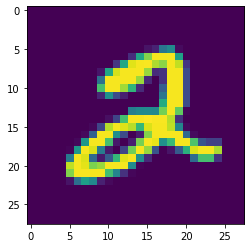

In [13]:
viz(5)

Finding certain numbers in target dataset:

In [14]:
np.where(y==9)

(array([    4,    19,    22, ..., 69945, 69973, 69992]),)

Above arrays shows where number 9 stored in y

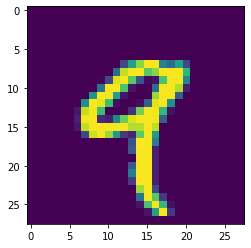

In [15]:
viz(4)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, shuffle=True,random_state=42)

## Binary Classification (Zero-non zero)

In [18]:
y_train_0 = (y_train == 0)

In [19]:
 from sklearn.linear_model import SGDClassifier

## SGD Training

In [20]:
model_1 = SGDClassifier(random_state = 0)
model_1.fit(X_train,y_train_0)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=0, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

## Prediction

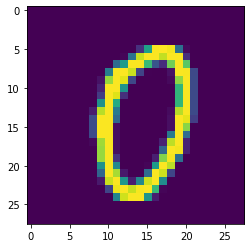

In [21]:
viz(1000)

In [22]:
model_1.predict(X[1000].reshape(1,-1))

array([ True])

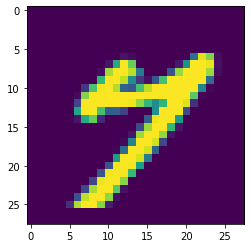

In [23]:
viz(1001)

In [24]:
model_1.predict(X[1001].reshape(1,-1))

array([False])

## Accuracy

In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
cross_val_score(model_1,X_train,y_train_0,cv=3,scoring='accuracy')

array([0.98708952, 0.98987518, 0.9877317 ])

## Confusion Matrix

In [27]:
from sklearn.model_selection import cross_val_predict

In [28]:
y_train_pred = cross_val_predict(model_1,X_train,y_train_0,cv=3)

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
confusion_matrix(y_train_0,y_train_pred)

array([[50092,   348],
       [  311,  5249]])

In [31]:
import pandas as pd

In [33]:
pd.DataFrame(confusion_matrix(y_train_0,y_train_pred),
             columns=pd.MultiIndex.from_product([['Prediction'],['Negative','Positive']]),
             index=pd.MultiIndex.from_product([['Actual'],['Negative','Positive']]))

Prediction         
                  Negative Positive
Actual Negative      50092      348
       Positive        311     5249

## Precision Score

In [34]:
from sklearn.metrics import precision_score,recall_score

In [35]:
precision_score(y_train_0,y_train_pred)

0.9378238341968912

## Recall Score

In [36]:
recall_score(y_train_0,y_train_pred)

0.9440647482014388

## F1 Score

In [37]:
from sklearn.metrics import f1_score

In [38]:
f1_score(y_train_0,y_train_pred)

0.9409339428161692

## Precision Recall Trade Off

In [39]:
y_scores = cross_val_predict(model_1,X_train,y_train_0,cv=3,method='decision_function')

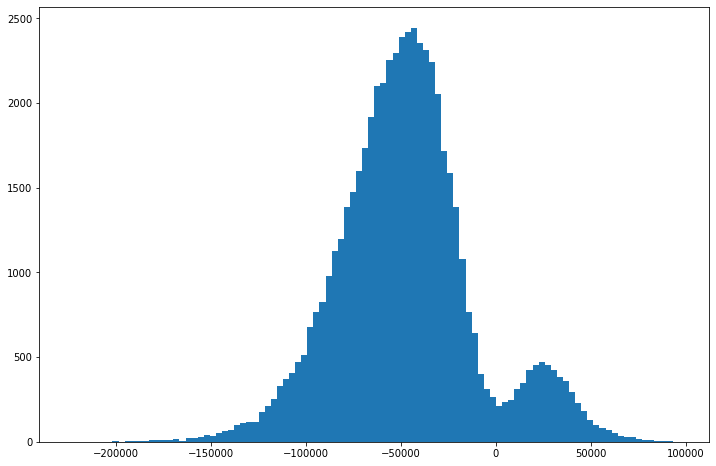

In [49]:
plt.figure(figsize=(12,8));
plt.hist(y_scores,bins=100);

In [48]:
from sklearn.metrics import precision_recall_curve

In [45]:
precisions, recalls, thresholds = precision_recall_curve(y_train_0,y_scores)

In [46]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([-0.5,1.5])    

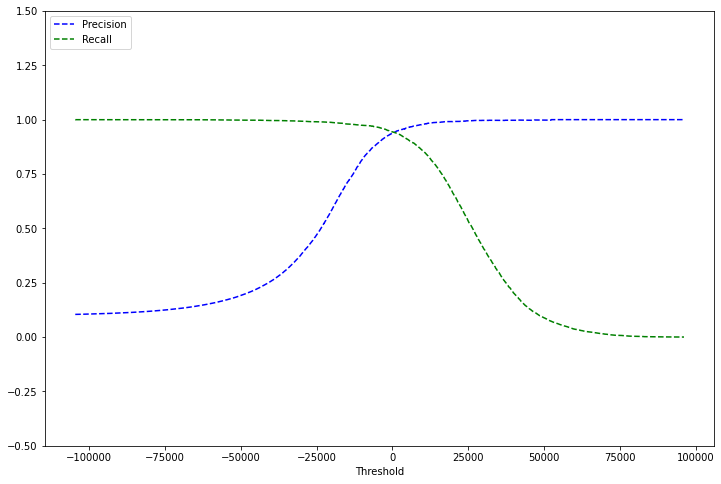

In [47]:
plt.figure(figsize=(12,8)); 
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

## Finding Thresholds for High Precisions

In [50]:
len(precisions)

53261

In [51]:
len(thresholds)

53260

Text(0, 0.5, 'Precisions')

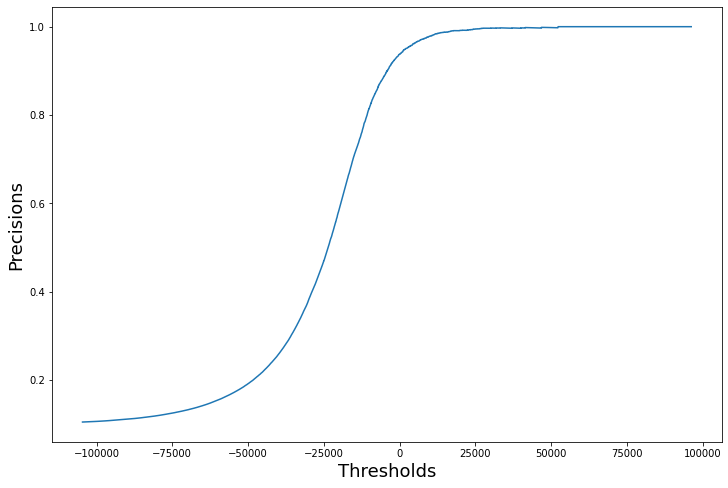

In [60]:
plt.figure(figsize=(12,8))
plt.plot(thresholds,precisions[1:]);
plt.xlabel('Thresholds',fontsize=18)
plt.ylabel('Precisions',fontsize=18)

In [61]:
index = len(precisions[precisions<0.9])

In [62]:
thresholds[index]

-4122.7516397743375

In [63]:
y_train_pred_90 = (y_scores > thresholds[index])

In [64]:
precision_score(y_train_0,y_train_pred_90)

0.900235531628533

## ROC Curve

In [65]:
from sklearn.metrics import roc_curve

In [66]:
fpr, tpr, thresholds = roc_curve(y_train_0, y_scores)

In [67]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

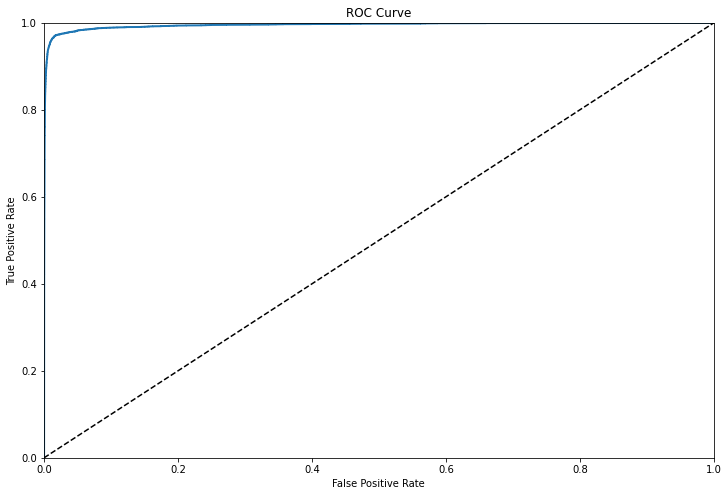

In [68]:
plt.figure(figsize=(12,8)); 
plot_roc_curve(fpr, tpr)
plt.show();

In [69]:
from sklearn.metrics import roc_auc_score

In [70]:
roc_auc_score(y_train_0, y_scores)

0.9949590830903875